# DTEK0042 Exercise 4
    Group Members:
    1. Niko Itänen
    2. Tea Suovuori

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a SCG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given SCG signals. Please provide caption and description for every figure. 

## 1- library Imports

In [33]:
#scipy imports
#import scipy 
from scipy import signal,stats
#from scipy.signal import butter, filtfilt, freqz

#numpy imports
import numpy as np

#matplotlib imports
import matplotlib.pyplot as plt

#sklean imports
from sklearn.decomposition import PCA
from sklearn import preprocessing as prep
from sklearn.preprocessing import scale
#other imports
from glob import glob

# Data Import 
* Load the .txt files of SCG data that are stored in the folder named “dataset” into your python environment.  
* For each .txt data file, select the 3rd column which contains the Z-axis of the SCG signals. 
* Note: the sampling frequency of this signal is 200 Hz. 

        Hint:  
        * to automate the loading process you can get a list of all data file paths using glob package and subsequently load the files in a for loop. 
        
        * dataFiles = glob.glob(path_to_dataset) to get a list of file paths of "dataset\xxdata.txt"
        
         then load the paths one by one in a loop

In [34]:
fs=200 # Sampling frequency

# Load data from the database directory
dataFiles = glob('dataset/*.txt')

# Initialize an empty list to store the data
sig = []

# Load the data from list one by one.
for dataFile in dataFiles:
    data = np.loadtxt(dataFile)
    # Append the 3rd column of the data to the all_data list
    data = data[:,2]
    sig.append(data)

# Noisy Vs Normal Plotting

* Plot the z-axis SCG signal from the file "Noisy_data_1.txt" and plot the z-axis SCG signal from the file "Normal_data_1.txt" 
* Describe your observations and how the plots differ from one another.


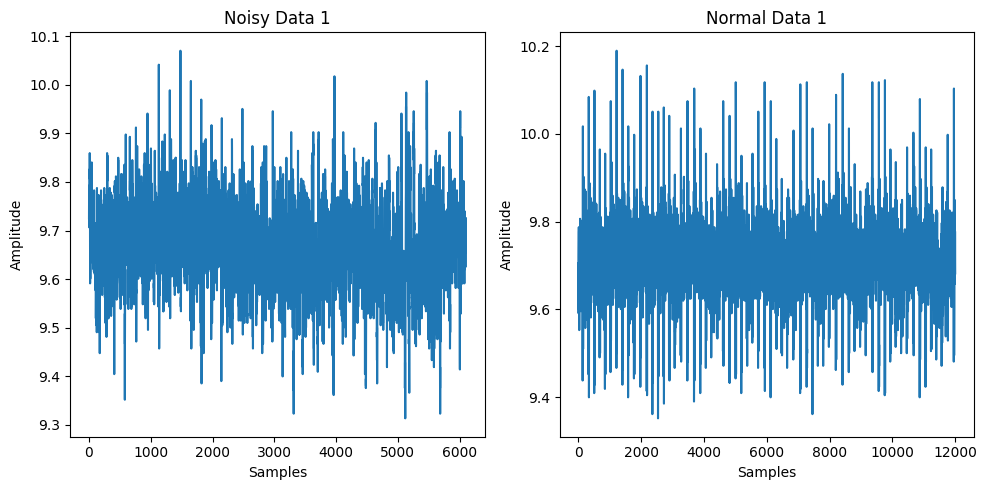

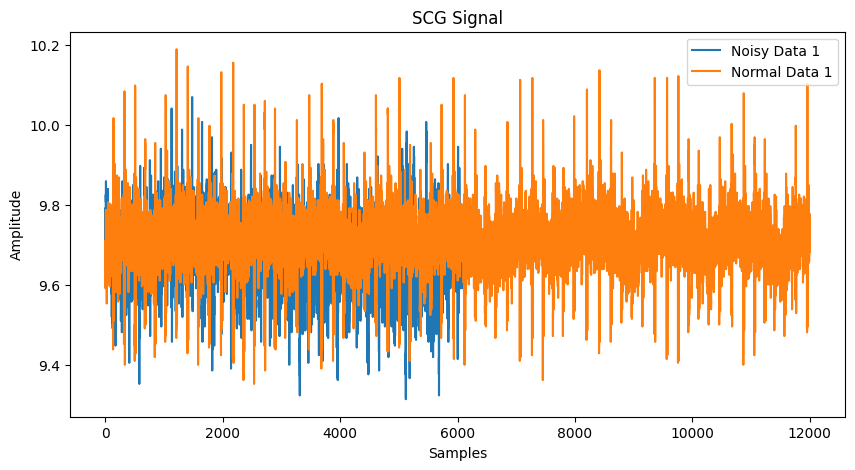

In [35]:
# Plot the SCG signal from the first file.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(sig[0])
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noisy Data 1')


# Plot the SCG signal from the fifth file.
plt.subplot(1,2,2)
plt.plot(sig[4])
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Normal Data 1')
plt.tight_layout()
plt.show()

# Plot the SCG signal from the first file and the fifth fiel.
plt.figure(figsize=(10,5))
plt.plot(sig[0])
plt.plot(sig[4])
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('SCG Signal')
plt.legend(['Noisy Data 1', 'Normal Data 1'])
plt.show()

Looking at Figure 1, where both signals are plotted separately, we can easily see that the noisy signal is not stable and is unfiltered. In the normal data, there are more cleaner peaks, even though there are almost twice as many samples.

Looking at Figure 2, where both signals are plotted on top of each other, it is possible to see noise in the blue signals, which clearly hides a lot of information about the actual observations.

# Data Segmentation 
* Here is a simple function to use for data segmentation
* Segment the Z-axis signals into 5-second segments
* The sampling frequency used to record these signals is 200 Hz.
* Store the segments and the accompanying labels

In [36]:
#code (provided)

def _slicing(sig, file_label, segment_length = 1000):
    
    """
    inputs:
    sig : input array to be segmented
    file_label : label to be applied to segmented signal
    segment_length : Length in samples of the segments produced from the input signal
    
    outputs:
    sig_sliced : a list of segments
    label : a list of corresponding labels for the segmented signal 
    
    """

    sig_sliced = []
    label = []
    
    # slicing 
    
    for i in np.arange(int(len(sig)/segment_length)):

        sig_sliced.append(sig[i*segment_length:(i+1)*segment_length] )

        label.append(file_label)
        
    return (sig_sliced , label)

# Feature Extraction Function Creation
*  Define a function and name it “feature_extraction” in which you compute and return the features listed below
    * *Time Domain Features*:  mean, standard deviation, interquartile-range, median, peak-to-peak range, skewness, kurtosis, and root mean square. 
    * *Frequency Domain Features*: power spectral density (using welch function of scipy)
    
        * For power spectral density, Calculate the total power spectral density within frequency bins of 4 Hz steps. Discard the frequencies above 40 Hz. Get the power within each bin.
    
        Hint:
        
        Reference: https://docs.scipy.org/doc/scipy/reference/stats.html for skewness, kurtosis, interquartile-range(iqr)
        
        Reference: https://numpy.org/doc/stable/reference/routines.statistics.html for other time domain features
        
        Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html for transforming to zero mean and unit variance



In [37]:
#code
def feature_extraction(sig, fs = 200):
    
    
    """
    inputs:
    sig : input array to extract features from
    fs : sampling frequency of input array

    
    outputs:
    feature_array: an array containing all the features extracted from the signal 
    """
    
    
    ########################################## statistical features - time domain
    
    # Calculate the mean of the signal
    mean = np.mean(sig)

    # Calculate the standard deviation of the signal
    std = np.std(sig)

    # Calculate the interquartile range of the signal
    iqr = stats.iqr(sig)

    # Calculate the median of the signal
    median = np.median(sig)

    # Calculate the peak-to-peak range of the signal
    ptp = np.ptp(sig)

    # Calculate the skewness of the signal
    skew = stats.skew(sig)

    # Calculate the kurtosis of the signal
    kurt = stats.kurtosis(sig)

    # Calculate the root mean square of the signal
    rms = np.sqrt(np.mean(sig**2))
        
    ########################################## PSD
    
    # transforming to zero mean and unit variance -- only do this when extracting PSD
    transformed_sig = scale(sig)

    # Calculate the power spectral density of the signal

    # Hint: transfromed_sig = function_for_scale(sig)
    
    frequencies , PSD = signal.welch(transformed_sig, fs, nperseg = 4*fs)
    
    freqs_arr = np.arange(0,41,4)
    
    PSD_binned_sum = []

    # Sum the power spectral density in each of the frequency bands
    for i in range(freqs_arr.shape[0]-1): 
        
        PSD_binned_sum.append (np.sum(PSD[np.where( (frequencies >= freqs_arr[i] ) & 
                                                   ( frequencies < freqs_arr[i+1] ) )]) )
        
    
    # Return the feature array
    feature_array = np.array([mean, std, iqr, median, ptp, skew, kurt, rms] + PSD_binned_sum)

    return feature_array


# Feature Extraction Application

* You must first segment your signals and then extract features from each segment. You could do it in the following way:



* Call the _slicing function to section all the z-axis data into 5-second segments
        Hint: Load each file in "dataFiles" with for-loop
* Use the feature extraction function you created and extract features from every segment that you have obtained.
* Store the labels and the features you extracted from each segment to numpy arrays. 
        Hint: Think of an easy way to extract the label "noisy" or "normal" from each file name
        str.split() could be used somehow in this case

In [38]:
# Initialize the arrays
features = np.empty((0, 18)) # 8 statistical features + 10 PSD features
labels = np.empty((0, 1)) # 1 label

# Load each file in "dataFiles" with for-loop
for i, dataFile in enumerate(dataFiles):

    # Load the data
    data = np.loadtxt(dataFile)
    data = data[:,2]

    # Determine the label from the file name
    if "Normal" in dataFile:
        label_value = 0 # Normal
    elif "Noisy" in dataFile:
        label_value = 1 # Noisy

    # Slice the data
    sliced_data, label = _slicing(data, i)

    # Extract features from sliced data
    for segment in sliced_data:
        features = np.vstack((features, feature_extraction(segment)))
        file_labels = np.array([[label_value]])
        labels = np.vstack((labels, file_labels))

# Standardize Features
Hint:

    Use sklearn.preprocessing.scale() to standardize the features
    Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [39]:
# Standardize the features using sklearn's scale function
features = scale(features)

# Principal Component Analysis
* Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set consisting of many variables correlated with each other. This can then be used to visualize the data in a more practical way. 
* Compute the first and 2nd principal components
* Plot the two components on a scatter plot with the coloring done by label
* Are these features useful to seperate the two types of signals (noisy vs normal)?
* Describe your observations.
    
        Hint:
        my_pca=PCA(n_components=2)
        pca_out = my_pca.fit_transform(input)

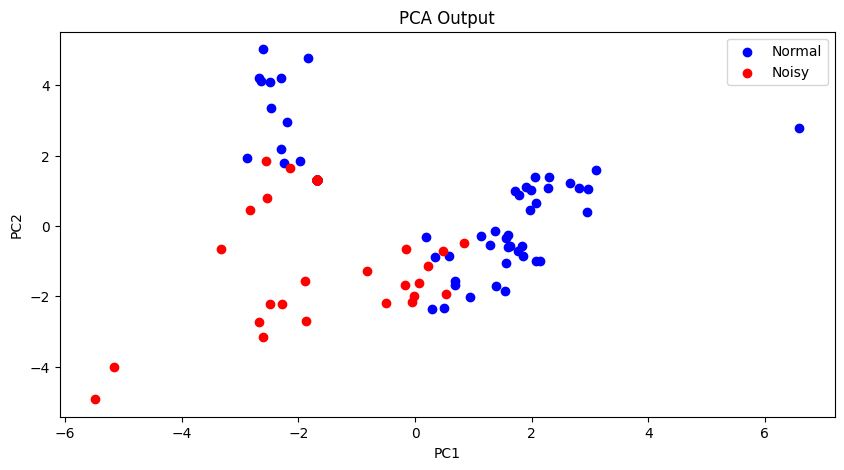

In [40]:
# Compute the first and 2nd principal components
my_pca = PCA(n_components=2)
pca_out = my_pca.fit_transform(features)

# Plot the PCA output on a scatter plot
plt.figure(figsize=(10,5))
plt.scatter(pca_out[np.where(labels == 0), 0], pca_out[np.where(labels == 0), 1], c='b', label='Normal')
plt.scatter(pca_out[np.where(labels == 1), 0], pca_out[np.where(labels == 1), 1], c='r', label='Noisy')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Output')
plt.legend()
plt.show()

# Observations 

- In a noisy PCA, their values are much more variable and not clearly distinguishable from each other. The variability suggest that noise is affecting the data, making it harder to identify distinct clusters.

- In a normal PCA, on the other hand, there are two areas where the calculated points are located. It is much easier to find a cluster between them. For some reason, one of the calculated points is very far away, which may be due to noise left after filtering.